In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv('./clean_df.csv')

In [23]:
# Creating numeric and string sub data frames
df_numeric = df.select_dtypes(include=['int64','float64'])
df_object = df.select_dtypes(include=['object'])

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Management Fee,1376.0,1.622148e-02,1.054754e-02,0.000000e+00,7.000000e-03,1.500000e-02,2.500000e-02,5.500000e-02
Minimum Investment,1376.0,3.888016e+05,2.913436e+06,0.000000e+00,1.000000e+03,1.000000e+04,5.000000e+04,5.000000e+07
Performance Fee,1376.0,6.561773e-02,9.391147e-02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01,5.000000e-01
Liquidity Ratios,1376.0,7.752907e+00,2.662797e+01,0.000000e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.040000e+02
age_months,1376.0,1.362282e+02,8.136918e+01,2.400000e+01,7.100000e+01,1.200000e+02,1.880000e+02,5.950000e+02
CVM Category_Fixed Income,1376.0,4.120640e-01,4.923855e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
CVM Category_Multimarket,1376.0,3.095930e-01,4.624939e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
CVM Category_Equities,1376.0,2.521802e-01,4.344220e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
CVM Category_FX,1376.0,2.470930e-02,1.552942e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Tax Classification_Exempt,1376.0,5.813953e-03,7.605495e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


# Plots on Numeric Data Frames

In [25]:
def multi_box_plot(multi_plt_df):
    col_size = len(multi_plt_df.columns)
    fig, axs = plt.subplots(max(2,col_size//2), 2,figsize=(12,6))
    for pos,column in enumerate(multi_plt_df.columns):
        x = min(pos//2 + pos%2 ,pos//2)
        y = max(pos%2,pos%2)
        axs[x, y].boxplot(multi_plt_df[column].values, 0,'k', 0)
        axs[x, y].set_title(column,fontsize = 15)

    fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                        hspace=0.4, wspace=0.3)

In [26]:
fees_columns = ['Management Fee','Management Fee']
fund_caracteristics = ['Management Fee','Liquidity Ratios']
fund_performance = ['Return_6m', 'Return_12m','Return_24m',
                    'Volatility_6m', 'Volatility_12m', 'Volatility_24m']

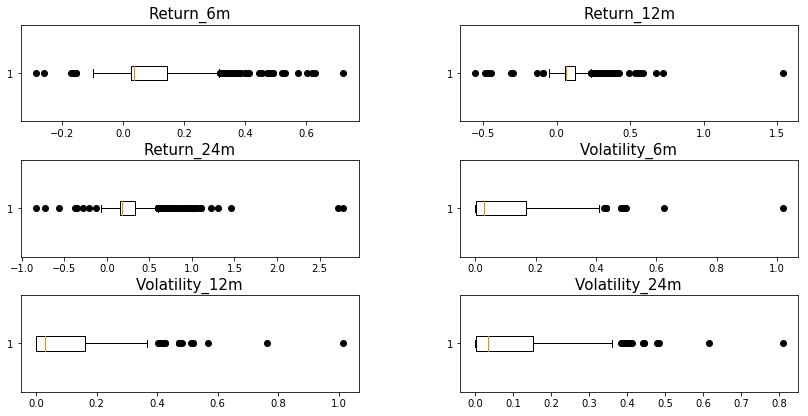

In [27]:
multi_box_plot(df_numeric[fund_performance])

## Analizing Most Significant Correlations

In [28]:
unstaked_series = df_numeric.corr().unstack()
unstaked_series = unstaked_series.sort_values(kind="quicksort")

pair_corr_df = pd.DataFrame(unstaked_series)
pair_corr_df.columns = ['correlation']
pair_corr_df.index.names = ['Feature1','Feature2']
# All correlations Lower than -0.5
pair_corr_df[pair_corr_df['correlation']<-0.5]

,,correlation
Feature1,Feature2,
Performance Fee,Performance Fee Reference Index_There is not,-0.983134
Performance Fee Reference Index_There is not,Performance Fee,-0.983134
Tax Classification_Long Term,CVM Category_Equities,-0.865718
CVM Category_Equities,Tax Classification_Long Term,-0.865718
Private Credit Anbima_Not applicable,Tax Classification_Long Term,-0.795655
Tax Classification_Long Term,Private Credit Anbima_Not applicable,-0.795655
Volatility_6m,Tax Classification_Long Term,-0.732897
Tax Classification_Long Term,Volatility_6m,-0.732897
Volatility_24m,Tax Classification_Long Term,-0.722625


In [29]:
df_numeric['CVM Category_Fixed Income'].value_counts()

0    809
1    567
Name: CVM Category_Fixed Income, dtype: int64

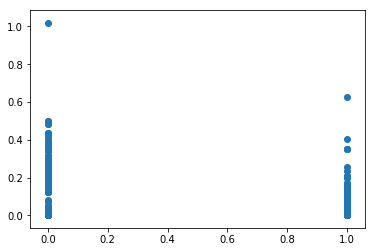

In [30]:
plt.scatter(df_numeric['Tax Classification_Long Term'], df_numeric['Volatility_6m'])

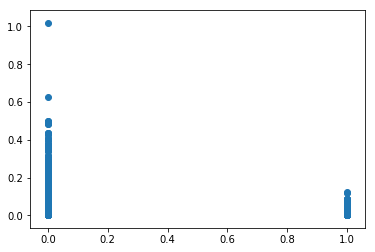

In [31]:
plt.scatter(df_numeric['CVM Category_Fixed Income'], df_numeric['Volatility_6m'])

In [32]:
# All correlations Grater than +0.5
pair_corr_df[(pair_corr_df['correlation']>0.8) 
             & (pair_corr_df['correlation']<0.9999)].sort_values(['correlation'],ascending=False)

correlation
Feature1                             Feature2                                         
Average_Assets_6m                    Last_Assets                              0.997680
Last_Assets                          Average_Assets_6m                        0.997680
Average_Assets_12m                   Average_Assets_6m                        0.993679
Average_Assets_6m                    Average_Assets_12m                       0.993679
Volatility_12m                       Volatility_24m                           0.989810
Volatility_24m                       Volatility_12m                           0.989810
Average_Assets_24m                   Average_Assets_12m                       0.989412
Average_Assets_12m                   Average_Assets_24m                       0.989412
                                     Last_Assets                              0.986615
Last_Assets                          Average_Assets_12m                       0.986615
Volatility_12m                       Volatility_6m                            0.982945
Volatility_6m                        Volatility_12m                           0.982945
                                     Volatility_24m                           0.973963
Volatility_24m                       Volatility_6m                            0.973963
Average_Assets_6m                    Average_Assets_24m                       0.968927
Average_Assets_24m                   Average_Assets_6m                        0.968927
                                     Last_Assets                              0.955434
Last_Assets                          Average_Assets_24m                       0.955434
Assets_Flow_24m                      Assets_Flow_12m                          0.924054
Assets_Flow_12m                      Assets_Flow_24m                          0.924054
CVM Category_Equities                Private Credit Anbima_Not applicable     0.908452
Private Credit Anbima_Not applicable CVM Category_Equities                    0.908452
Benchmark_Dollar                     CVM Category_FX                          0.839149
CVM Category_FX                      Benchmark_Dollar                         0.839149
Volatility_6m                        CVM Category_Equities                    0.808646
CVM Category_Equities                Volatility_6m                            0.808646
Volatility_24m                       CVM Category_Equities                    0.800830
CVM Category_Equities                Volatility_24m                           0.800830

In [38]:
df_numeric.shape

(1376, 49)

### Scaling data

In [33]:
ss = StandardScaler()
X = df_numeric
Y = df_object
X_sc = pd.DataFrame(ss.fit_transform(X))
X_sc.columns = df_numeric.columns

C:\Users\berku\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\berku\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
X_sc.head()

,Management Fee,Minimum Investment,Performance Fee,Liquidity Ratios,age_months,CVM Category_Fixed Income,CVM Category_Multimarket,CVM Category_Equities,CVM Category_FX,Tax Classification_Exempt,...,Excess_Return_-_CDI_Opening_12m,Excess_Return_-_CDI_Opening_24m,Excess_Return_-_Ibovespa_6m,Excess_Return_-_Ibovespa_12m,Excess_Return_-_Ibovespa_24m,Excess_Return_-_Dollar_6m,Excess_Return_-_Dollar_12m,Excess_Return_-_Dollar_24m,#_Funds_managed,Manager_avg_Assets
0,1.781016,-0.133156,-0.698973,0.572805,1.595432,-0.837177,1.493334,-0.580707,-0.159171,-0.076472,...,-0.258833,-0.296130,-0.304793,-0.258833,-0.296130,-0.304793,-0.258833,-0.296130,-0.880455,-0.642840
1,0.832583,-0.116332,1.431467,0.197124,-1.133866,-0.837177,1.493334,-0.580707,-0.159171,-0.076472,...,-0.018112,-0.163462,-0.442559,-0.018112,-0.163462,-0.442559,-0.018112,-0.163462,-0.850756,0.350568
2,0.832583,-0.116332,1.431467,-0.103422,-0.887983,-0.837177,1.493334,-0.580707,-0.159171,-0.076472,...,0.054853,-0.038277,-0.380956,0.054853,-0.038277,-0.380956,0.054853,-0.038277,-0.850756,0.350568
3,0.832583,-0.064827,1.431467,0.497669,-0.887983,-0.837177,1.493334,-0.580707,-0.159171,-0.076472,...,0.647893,0.595312,-0.156849,0.647893,0.595312,-0.156849,0.647893,0.595312,-0.850756,0.350568
4,0.642897,-0.133156,1.431467,0.610373,-1.355160,-0.837177,-0.669642,1.722039,-0.159171,-0.076472,...,-0.594905,0.873327,1.559855,-0.594905,0.873327,1.559855,-0.594905,0.873327,-0.880455,-0.707545


In [35]:
X_sc.to_csv('./X_scaled.csv',index=False)
Y.to_csv('./fund_info.csv',index=False)

In [36]:
X_sc.columns

Index(['Management Fee', 'Minimum Investment', 'Performance Fee',
       'Liquidity Ratios', 'age_months', 'CVM Category_Fixed Income',
       'CVM Category_Multimarket', 'CVM Category_Equities', 'CVM Category_FX',
       'Tax Classification_Exempt', 'Tax Classification_Long Term',
       'Tax Classification_Short Term', 'Private Credit Anbima_Not applicable',
       'Private Credit Anbima_Yes', 'Leveraged Anbima_Yes',
       'Performance Fee Reference Index_100% do IBX',
       'Performance Fee Reference Index_100% do Ibovespa',
       'Performance Fee Reference Index_Other_performance_fee',
       'Performance Fee Reference Index_There is not', 'Benchmark_Dollar',
       'Benchmark_IBX', 'Benchmark_IMA-B', 'Benchmark_Ibovespa',
       'Benchmark_Not Informed', 'Benchmark_Other_Benchmark', 'Last_Assets',
       'Assets_Flow_6m', 'Assets_Flow_12m', 'Assets_Flow_24m',
       'Average_Assets_6m', 'Average_Assets_12m', 'Average_Assets_24m',
       'Return_6m', 'Return_12m', 'Return_24m', 